In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
from itertools import product
import re

In [12]:
def neighbor_edges_of_node(graph, node):
    neighbor_edges = []
    for edge in graph.edges():
        if node in edge:
            neighbor_edges.append(edge)
    return neighbor_edges

In [13]:
def is_valid_coloring(graph, coloring):
    edge_color = {edge: coloring[i] for i, edge in enumerate(graph.edges())}
    
    for edge in graph.edges():
        u, v = edge
        
        u_edges = neighbor_edges_of_node(graph, u)
        v_edges = neighbor_edges_of_node(graph, v)

        u_edges.remove(edge)
        v_edges.remove(edge)
        
        for i in range(len(u_edges)):
            if edge_color[u_edges[i]] == edge_color[edge]:
                return False
        
        for j in range(len(v_edges)):  
            if edge_color[v_edges[j]] == edge_color[edge]:
                return False
    return True

In [14]:
def draw_colored_graph(graph, coloring):    
    nx.draw(graph, with_labels=True, edge_color=coloring)
    plt.show()

In [15]:
def brute_force_edge_coloring(graph, start_time):
    n = len(graph.edges())
    iters = 0

    for coloring in product(range(1, n + 1), repeat=n):
        iters += 1
        if time.time() - start_time >= 390:
            return -1, -1
        if is_valid_coloring(graph, coloring):
            return coloring, iters
            
    return None

In [16]:
def read_graph_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split()[2:])  # extracting num_nodes and num_edges
        edges = [tuple(map(int, line.split()[1:])) for line in lines[1:] if line.startswith('e')]
        graph = nx.Graph()
        graph.add_nodes_from(range(1, num_nodes + 1))
        graph.add_edges_from(edges)
        
        return graph

In [17]:
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    parts[1] = int(parts[1]) if len(parts) > 1 else 0
    return parts

In [18]:
def write_output(graph, test_name, coloring_result, iter, start_time, end_time):
    with open('./results/bruteForce_results.txt', 'a') as result_file:
        result_file.write(f"Test Name: {test_name}\n")
        result_file.write("Result: ")
        
        if coloring_result == -1:
            result_file.write("Time limit exceeded.\n")
            print("Time limit exceeded.\n")
        else:
            if coloring_result:
                result_file.write("Minimum edge coloring found.\n")
                result_file.write(f"Number of colors: {max(coloring_result)}\n")
                result_file.write(f"Number of iterations: {iter}\n")

                print("Minimum edge coloring found.")
                print("Number of colors:", max(coloring_result))  
                print("Number of iterations:", iter)
                draw_colored_graph(graph, coloring_result)
                plt.close() 
            else:
                result_file.write("No solution found.\n")
                print("No solution found.\n") 
        
        time_taken = end_time - start_time

        result_file.write(f"Time taken (seconds): {time_taken}\n")        
        result_file.write("\n")
        print("Time taken:", end_time - start_time, "seconds\n")


In [19]:
def run_tests(directory):
    files = os.listdir(directory)
    sorted_files = sorted(files, key=numerical_sort)

    for file in sorted_files:
        if file.endswith('.txt'):
            filepath = os.path.join(directory, file)
            print(f"Running test {file}...")

            start_time = time.time()
            graph = read_graph_from_file(filepath)
            coloring_result, iter = brute_force_edge_coloring(graph, start_time)
            end_time = time.time()

            write_output(graph, file, coloring_result, iter, start_time, end_time)     
                        

Running test graph_3_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 6


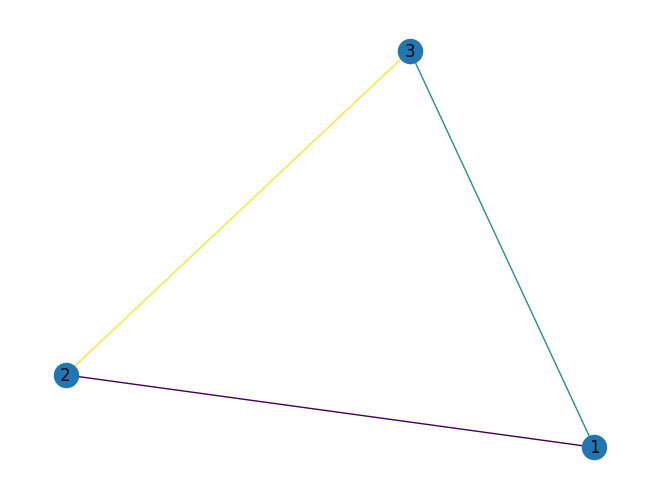

Time taken: 0.0010042190551757812 seconds

Running test graph_5_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 181


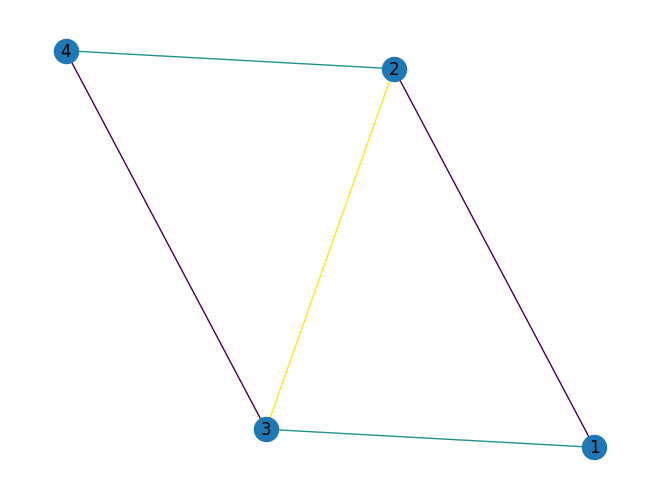

Time taken: 0.003999948501586914 seconds

Running test graph_5_edges_2.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 186


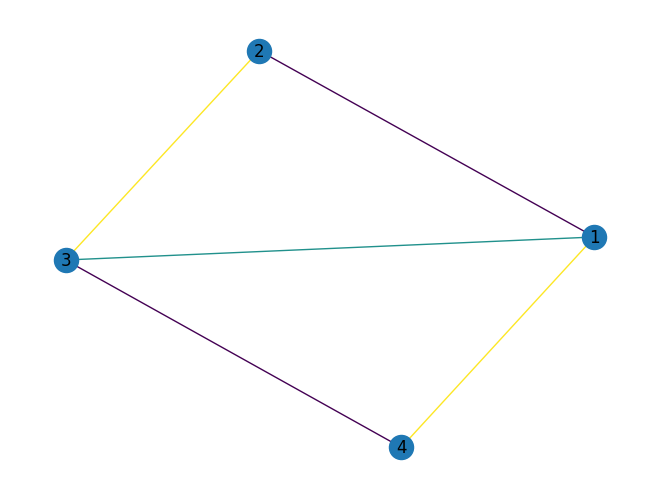

Time taken: 0.0 seconds

Running test graph_6_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 1765


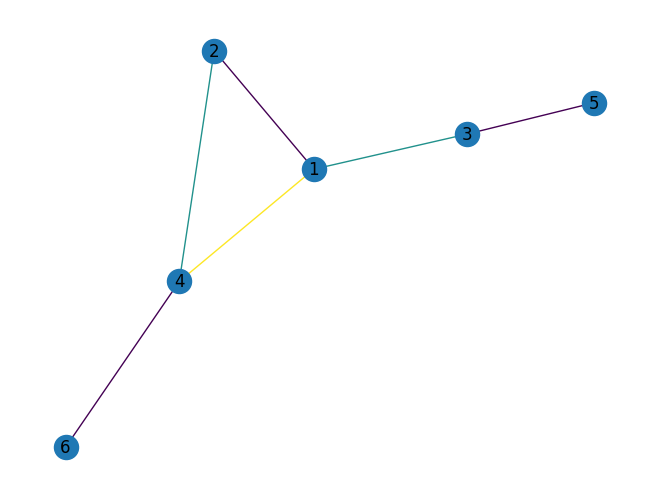

Time taken: 0.02849292755126953 seconds

Running test graph_7_edges.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 22054


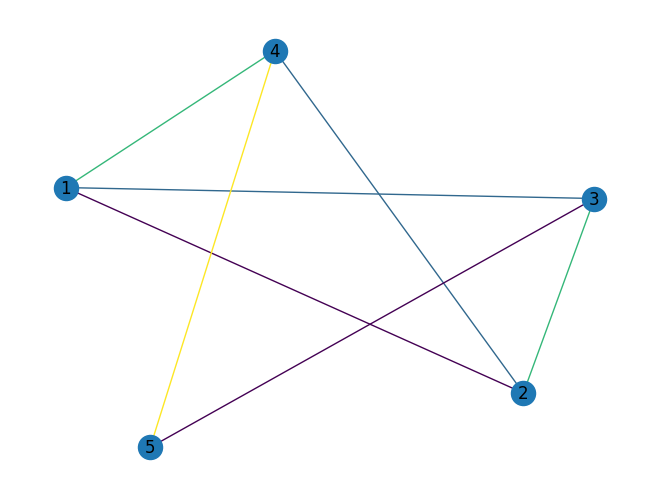

Time taken: 0.40540432929992676 seconds

Running test graph_7_edges_2.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 22348


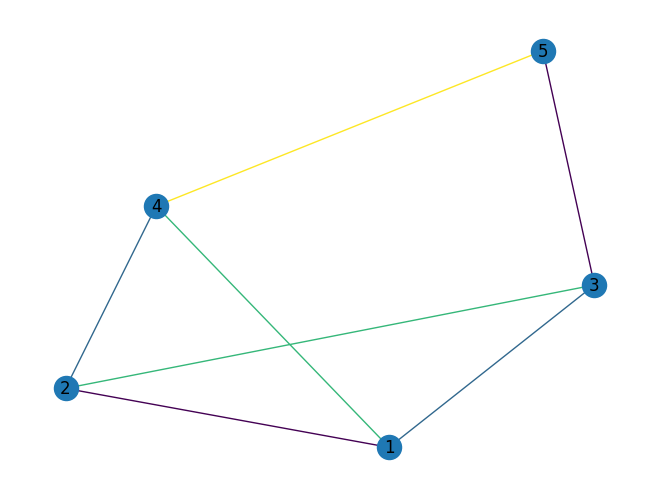

Time taken: 0.5930564403533936 seconds

Running test graph_7_edges_3.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 19895


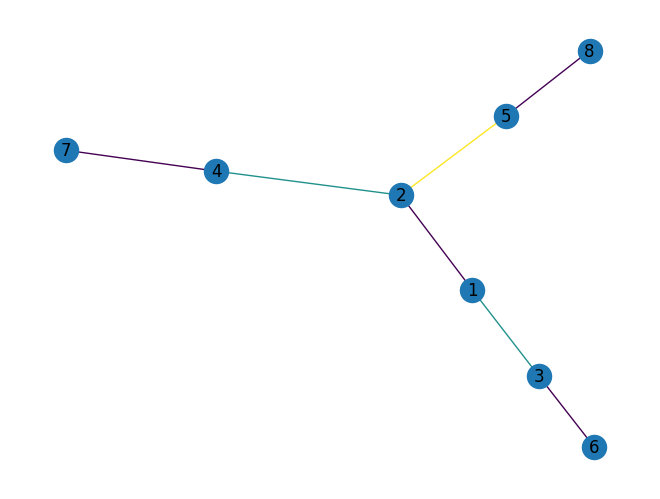

Time taken: 0.4296278953552246 seconds

Running test graph_8_edges.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 327753


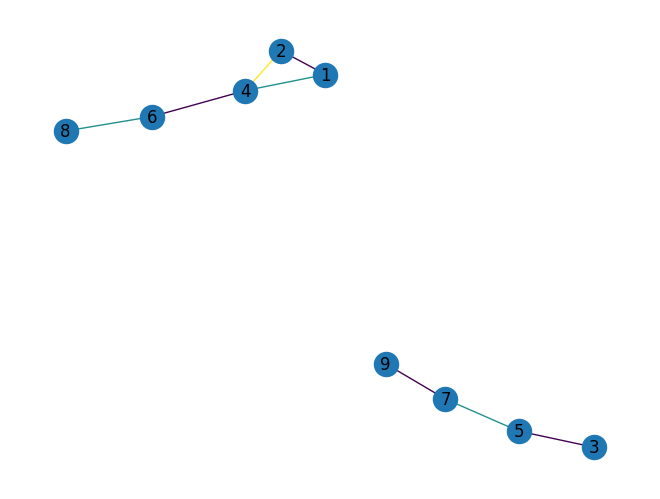

Time taken: 6.826897382736206 seconds

Running test graph_9_edges.txt...
Minimum edge coloring found.
Number of colors: 4
Number of iterations: 5906371


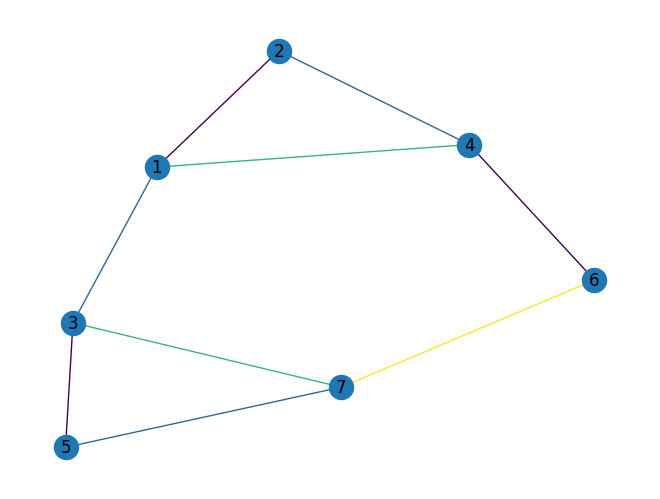

Time taken: 118.97568678855896 seconds

Running test graph_9_edges_2.txt...
Minimum edge coloring found.
Number of colors: 3
Number of iterations: 5432519


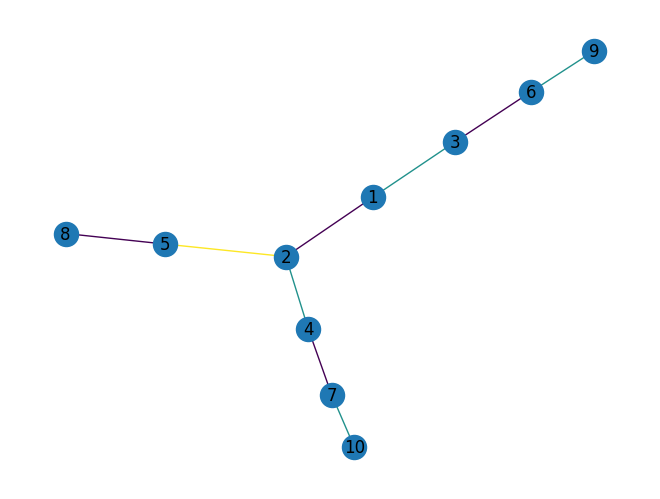

Time taken: 114.22899317741394 seconds

Running test graph_10_edges.txt...
Time limit exceeded.

Time taken: 390.0002613067627 seconds

Running test graph_10_edges_2.txt...
Time limit exceeded.

Time taken: 390.00002813339233 seconds

Running test graph_10_edges_3.txt...
Time limit exceeded.

Time taken: 390.00320076942444 seconds

Running test graph_11_edges.txt...
Time limit exceeded.

Time taken: 390.00029468536377 seconds

Running test graph_11_edges_2s.txt...
Time limit exceeded.

Time taken: 390.00077295303345 seconds

Running test graph_11_edges_3.txt...
Time limit exceeded.

Time taken: 390.000492811203 seconds

Running test graph_11_edges_4.txt...
Time limit exceeded.

Time taken: 390.00122714042664 seconds

Running test graph_12_edges.txt...
Time limit exceeded.

Time taken: 390.0035910606384 seconds

Running test graph_12_edges_2.txt...
Time limit exceeded.

Time taken: 390.0037212371826 seconds

Running test graph_15_edges.txt...
Time limit exceeded.

Time taken: 390.006273

In [20]:
with open('./results/bruteForce_results.txt', 'w') as result_file:
    result_file.write("")

run_tests('./tests')